# ProsperLoan Data Analysis 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import xticks

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df =  pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#lets see how many columns and rows in dataset
df.shape

(113937, 81)

In [4]:
#lets see what are the columns 
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

As we can see there are missing values in dataset.but we will use few columns only for this project.


In [6]:
cols = ['Term' , 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,  
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperRating (numeric)',
        'ProsperRating (Alpha)',
        'ProsperScore',                     
        'ListingCategory (numeric)', 
        'EmploymentStatus',
        'Occupation', 
        'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'Recommendations', 
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'Investors',
        'BorrowerState']

In [7]:
#lets create a new dataframe which we will use as final dataframe 
final_df  = df[cols]
final_df.columns

Index(['Term', 'LoanStatus', 'EstimatedEffectiveYield', 'BorrowerAPR',
       'BorrowerRate', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus',
       'Occupation', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
       'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount',
       'PercentFunded', 'IncomeRange', 'Investors', 'BorrowerState'],
      dtype='object')

In [8]:
final_df.describe()

,Term,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,Investors
count,113937.000000,84853.000000,113912.000000,113937.000000,84853.000000,84853.000000,113937.000000,106312.000000,1.139370e+05,113937.000000,113937.000000,105383.000000,113937.00000,113937.000000,113937.000000
mean,40.830248,0.168661,0.218828,0.192764,4.072243,5.950067,2.774209,96.071582,5.608026e+03,272.475783,0.048027,0.275947,8337.01385,0.998584,80.475228
std,10.436212,0.068467,0.080364,0.074818,1.673227,2.376501,3.996797,94.480605,7.478497e+03,192.697812,0.332353,0.551759,6245.80058,0.017919,103.239020
min,12.000000,-0.182700,0.006530,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1000.00000,0.700000,1.000000
25%,36.000000,0.115670,0.156290,0.134000,3.000000,4.000000,1.000000,26.000000,3.200333e+03,131.620000,0.000000,0.140000,4000.00000,1.000000,2.000000
50%,36.000000,0.161500,0.209760,0.184000,4.000000,6.000000,1.000000,67.000000,4.666667e+03,217.740000,0.000000,0.220000,6500.00000,1.000000,44.000000
75%,36.000000,0.224300,0.283810,0.250000,5.000000,8.000000,3.000000,137.000000,6.825000e+03,371.580000,0.000000,0.320000,12000.00000,1.000000,115.000000
max,60.000000,0.319900,0.512290,0.497500,7.000000,11.000000,20.000000,755.000000,1.750003e+06,2251.510000,39.000000,10.010000,35000.00000,1.012500,1189.000000


In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
EstimatedEffectiveYield      84853 non-null float64
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ProsperRating (numeric)      84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null object
Occupation                   110349 non-null object
EmploymentStatusDuration     106312 non-null float64
IsBorrowerHomeowner          113937 non-null bool
IncomeVerifiable             113937 non-null bool
StatedMonthlyIncome          113937 non-null float64
MonthlyLoanPayment           113937 non-null float64
Recommendations              113937 non-null int64
DebtToIn

In [10]:
#we can see many null values as we are doing visualization for this project we will drop all the null rows for simplicity 
final_df = final_df.dropna()
final_df.describe()

,Term,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,Investors
count,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000
mean,42.760470,0.166738,0.223901,0.193621,4.132413,6.080246,3.302259,104.578028,6002.833586,296.421859,0.016571,0.258032,9294.999410,0.998131,69.998517
std,11.744005,0.067595,0.079372,0.074088,1.661460,2.360640,4.396670,95.836443,5110.743506,189.674943,0.187732,0.320587,6413.404265,0.020572,97.801415
min,12.000000,-0.181600,0.045830,0.040000,1.000000,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1000.000000,0.700000,1.000000
25%,36.000000,0.114800,0.161570,0.134900,3.000000,4.000000,1.000000,32.000000,3583.333333,159.062500,0.000000,0.150000,4000.000000,1.000000,1.000000
50%,36.000000,0.157670,0.215660,0.184500,4.000000,6.000000,1.000000,76.000000,5041.666667,257.760000,0.000000,0.220000,8000.000000,1.000000,32.000000
75%,60.000000,0.219000,0.287800,0.254900,5.000000,8.000000,3.000000,150.000000,7250.000000,392.420000,0.000000,0.320000,14603.250000,1.000000,100.000000
max,60.000000,0.319900,0.423950,0.360000,7.000000,11.000000,20.000000,755.000000,483333.333333,2251.510000,19.000000,10.010000,35000.000000,1.012500,1189.000000


In [11]:
final_df.head()

,Term,LoanStatus,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,...,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,IncomeRange,Investors,BorrowerState
1,36,Current,0.07960,0.12016,0.0920,6.0,A,7.0,2,Employed,...,True,6125.000000,318.93,0,0.18,10000,1.0,"$50,000-74,999",1,CO
3,36,Current,0.08490,0.12528,0.0974,6.0,A,9.0,16,Employed,...,True,2875.000000,321.45,0,0.15,10000,1.0,"$25,000-49,999",158,GA
4,36,Current,0.18316,0.24614,0.2085,3.0,D,4.0,2,Employed,...,True,9583.333333,563.97,0,0.26,15000,1.0,"$100,000+",20,MN
5,60,Current,0.11567,0.15425,0.1314,5.0,B,10.0,1,Employed,...,True,8333.333333,342.37,0,0.36,15000,1.0,"$100,000+",1,NM
6,36,Current,0.23820,0.31032,0.2712,2.0,E,2.0,1,Employed,...,True,2083.333333,122.67,0,0.27,3000,1.0,"$25,000-49,999",1,KS


In [12]:
#we need to change few columns name as there is space in the column name 
final_df.rename(columns={'ProsperRating (Alpha)': 'ProsperRating_Alpha', 
                        'ProsperRating (numeric)': 'ProsperRating_Numeric',
                        'ListingCategory (numeric)' : 'ListingCategory_Numeric'
                       }, inplace=True)

In [13]:
#lets convert term as catagory type 
final_df['Term'] = final_df['Term'].astype('category')

final_df is our TIDY dataset.

In [14]:
#lets find out which are numeric columns
num_final_df = final_df.loc[:, (final_df.dtypes == np.float64) | (final_df.dtypes == np.int64)]
num_final_df.columns

Index(['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
       'ProsperRating_Numeric', 'ProsperScore', 'ListingCategory_Numeric',
       'EmploymentStatusDuration', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
       'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount',
       'PercentFunded', 'Investors'],
      dtype='object')

In [15]:
#lets find out categorical columns
cat_final_df = final_df.loc[:, (final_df.dtypes == 'object') | (final_df.dtypes == 'category')]
cat_final_df.columns


Index(['Term', 'LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus',
       'Occupation', 'IncomeRange', 'BorrowerState'],
      dtype='object')

### What is the structure of your dataset?

> This data set have 113937 rows and 81 columns.columns like Term,Loan status ,loan amount and many more.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in finding out which is the most effective feature that effect our load outcome. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Loan status.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [16]:
final_df.columns

Index(['Term', 'LoanStatus', 'EstimatedEffectiveYield', 'BorrowerAPR',
       'BorrowerRate', 'ProsperRating_Numeric', 'ProsperRating_Alpha',
       'ProsperScore', 'ListingCategory_Numeric', 'EmploymentStatus',
       'Occupation', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
       'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount',
       'PercentFunded', 'IncomeRange', 'Investors', 'BorrowerState'],
      dtype='object')

## Categorical Attribute  

In [17]:
#lets use value_count for understanding of attributes
final_df['IsBorrowerHomeowner'].value_counts()

True     41454
False    34762
Name: IsBorrowerHomeowner, dtype: int64

In [18]:
final_df['ProsperRating_Alpha'].value_counts()

C     16499
B     14379
A     13490
D     12629
E      8443
HR     5680
AA     5096
Name: ProsperRating_Alpha, dtype: int64

In [19]:
final_df['IncomeRange'].value_counts()

$50,000-74,999    23692
$25,000-49,999    21421
$100,000+         13977
$75,000-99,999    13547
$1-24,999          3578
Not employed          1
Name: IncomeRange, dtype: int64

In [20]:
final_df['Term'].value_counts()

36    51919
60    22883
12     1414
Name: Term, dtype: int64

In [21]:
final_df['Occupation'].value_counts()

Other                                 18501
Professional                           9916
Executive                              3206
Computer Programmer                    3038
Teacher                                2777
Analyst                                2683
Administrative Assistant               2603
Accountant/CPA                         2413
Nurse (RN)                             2121
Clerical                               2059
Skilled Labor                          2033
Sales - Commission                     1982
Retail Management                      1900
Sales - Retail                         1724
Police Officer/Correction Officer      1273
Truck Driver                           1218
Laborer                                1162
Civil Service                          1131
Engineer - Mechanical                  1098
Construction                           1052
Food Service Management                 935
Engineer - Electrical                   873
Medical Technician              

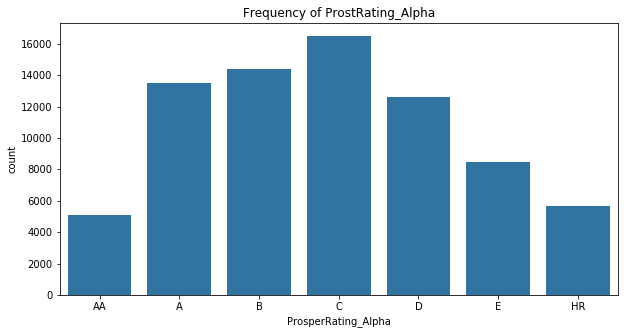

In [185]:
ProsperRating_Alpha_classes = ['AA','A', 'B', 'C', 'D', 'E', 'HR']
IncomeRange_classes = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = ProsperRating_Alpha_classes)
    final_df['ProsperRating_Alpha'] = final_df['ProsperRating_Alpha'].astype(vclasses)
    vclasses_1 = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeRange_classes)
    final_df['IncomeRange'] = final_df['IncomeRange'].astype(vclasses_1)
else: # compatibility for v.20
    final_df['ProsperRating_Alpha'] = final_df['ProsperRating_Alpha'].astype('category', ordered = True,
                                                     categories = ProsperRating_Alpha_classes)
    final_df['IncomeRange'] = final_df['IncomeRange'].astype('category', ordered = True,
                                                     categories = IncomeRange_classes)
plt.figure(figsize = [10, 5]) 
plt.title("Frequency of ProstRating_Alpha")
base_color = sb.color_palette()[0]
sb.countplot(data = final_df, x = 'ProsperRating_Alpha', color = base_color );

#### Plot Analysis
* This plot will show us the rating frequency for each.
* C prosperrating is highest in our data.

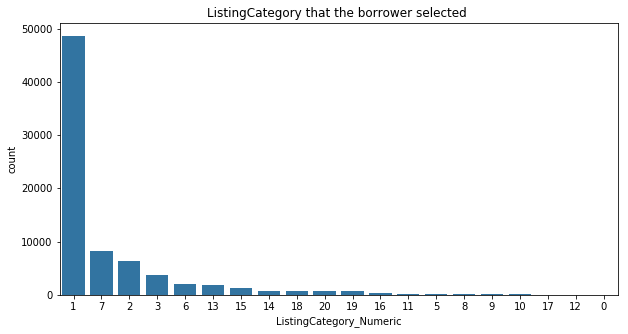

In [23]:
# ListingCategory_Numeric
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("ListingCategory that the borrower selected ")
sb.countplot(data = final_df, x = 'ListingCategory_Numeric', color = base_color,
             order = final_df['ListingCategory_Numeric'].value_counts().index );

#### Plot Analysis

* Debt Consolidation has highest borrower.

Below is the The category of the listing that the borrower selected when posting their listing:

0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

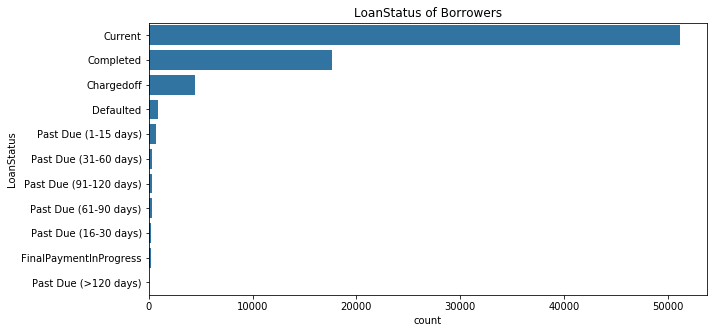

In [187]:
#lets check for loanstatus.
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("LoanStatus of Borrowers")
sb.countplot(data = final_df, y = 'LoanStatus', color = base_color,
             order = final_df['LoanStatus'].value_counts().index);

#### Plot Analysis
* Most of the loan status are in current or completed state

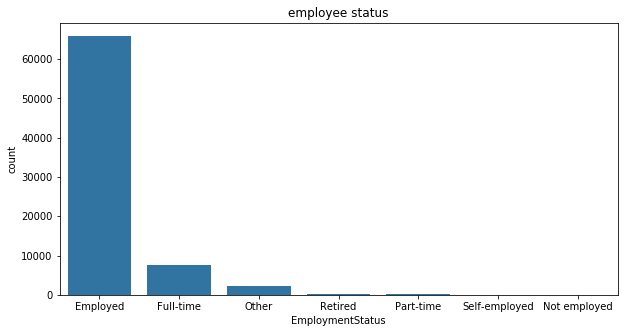

In [25]:
#for employeestatus
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]
plt.title('employee status')
sb.countplot(data = final_df,x='EmploymentStatus',color=base_color,order=final_df['EmploymentStatus'].value_counts().index);

#### Plot Analysis

* Most Emplymentstatus is Employed

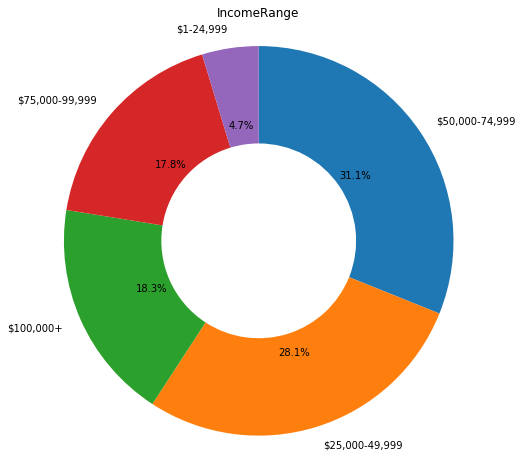

In [189]:
#IncomeRange
plt.figure(figsize = [15, 8])
sorted_counts = final_df[final_df['IncomeRange'] != 'Not employed']['IncomeRange'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.5}, autopct   = '%.1f%%',);
plt.title("IncomeRange")
plt.axis('square');

#### Plot Analysis

* Most income range of borrowers is 50,000-74,999 USD. 
* we have removed the Not employed records because it is not useful in our analsys

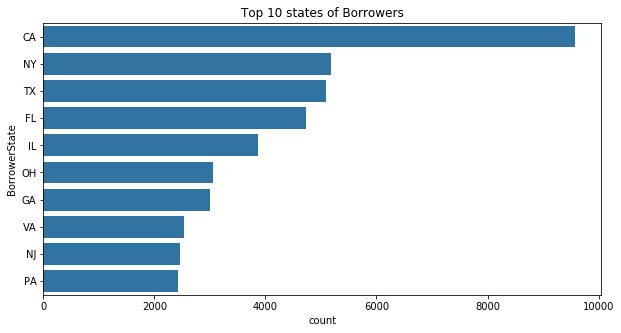

In [24]:
#borrowerstage
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = final_df, y = 'BorrowerState', color = base_color,
             order = final_df['BorrowerState'].value_counts().head(10).index );
plt.title("Top 10 states of Borrowers");

#### Plot Analysis

* Most loan given in CA and NY states
* This will show us the top states where borrowers number are high

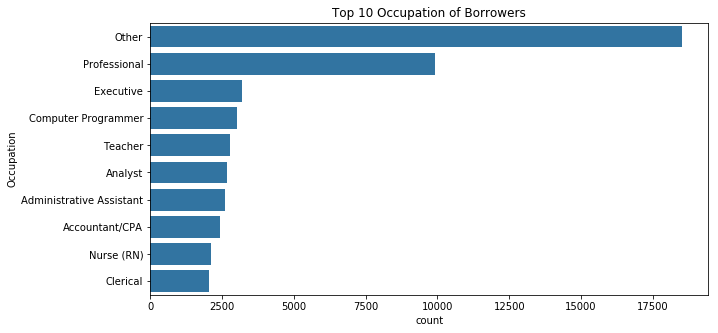

In [191]:
#occupation
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = final_df, y = 'Occupation', color = base_color,
             order = final_df['Occupation'].value_counts().head(10).index );
plt.title("Top 10 Occupation of Borrowers");

#### Plot Analysis
* Majority of the borrowers are with an occupation of Professional and Executive
* This plot shows us the occupation vs Borrowers count relationship

## categorical variables analysis
1. 'AA' category Loan are less compare to others
2. Debt Consolidation, Home Improvement are top 2 loan reasons.
3. most of the loan status are in current or completed state
4. Most Emplymentstatus is Employed
5. Most income range of borrowers is $50,000-74,999
6. most loan given in CA and NY states
7. Majority of the borrowers are with an occupation of Professional and Executive

## Numeric attributes

Numeric attreibutes are 'Term', 'EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating_Numeric', 'ProsperScore', 'ListingCategory_Numeric', 'EmploymentStatusDuration', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'PercentFunded', 'Investors'

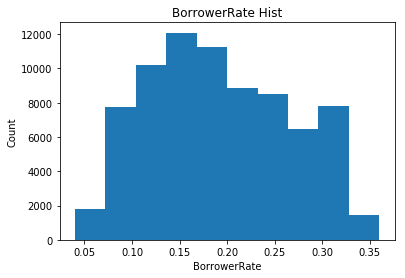

In [192]:
#borrowerRate
plt.hist(data = final_df, x = 'BorrowerRate');
plt.xlabel('BorrowerRate');
plt.ylabel('Count');
plt.title("BorrowerRate Hist");

#### Plot Analysis

* This is unimodal distribution which has peak around 0.15.

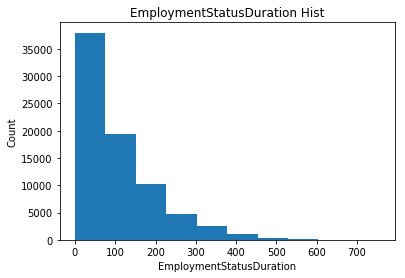

In [193]:
plt.hist(data = final_df, x = 'EmploymentStatusDuration');
plt.xlabel('EmploymentStatusDuration');
plt.ylabel('Count');
plt.title("EmploymentStatusDuration Hist");

#### Plot Analysis 

* range of 0-100 have highest emplouement status duration 

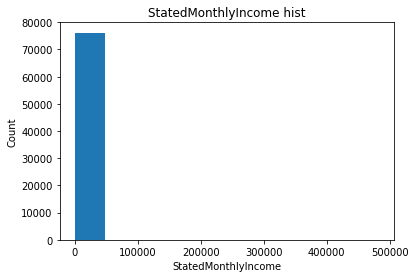

In [194]:
plt.hist(data = final_df, x = 'StatedMonthlyIncome');
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome hist");

#### Plot Analysis

* we have just one bar so we cant jump to concultion, for this we will add log base on this.

In [195]:
#this plot dont look normal 
final_df['StatedMonthlyIncome'].describe()

count     76216.000000
mean       6002.833586
std        5110.743506
min           0.250000
25%        3583.333333
50%        5041.666667
75%        7250.000000
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64

In [196]:
#lets check with log 
np.log10(final_df['StatedMonthlyIncome'].describe())

count    4.882046
mean     3.778356
std      3.708484
min     -0.602060
25%      3.554287
50%      3.702574
75%      3.860338
max      5.684247
Name: StatedMonthlyIncome, dtype: float64

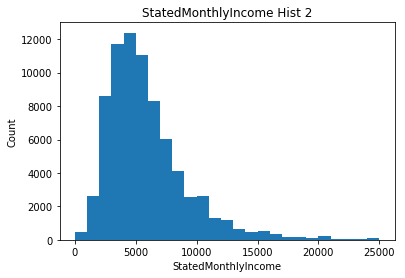

In [197]:
final_df_2 = final_df[final_df['StatedMonthlyIncome'] <= 25000]
bin_edges = np.arange(0, final_df_2['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data = final_df, x = 'StatedMonthlyIncome', bins = bin_edges);
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome Hist 2");

#### Plot Analysis 

* This data will be right skewed as few people will have high salary.When i added the log scales to data we can see most of the people have salary less than 10,000 

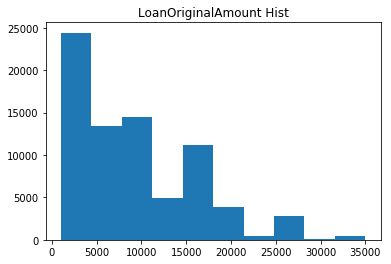

In [199]:
#loanOriginalAmount
plt.title('LoanOriginalAmount Hist')
plt.hist(data = final_df, x = 'LoanOriginalAmount');

#### Plot Analysis

* This is right skewed and have peaks around 3000,10,000 and 15,000

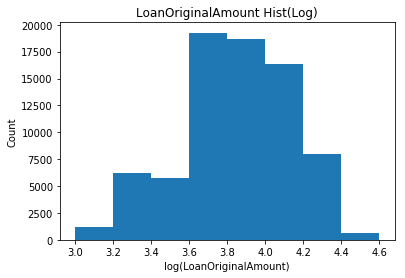

In [200]:
#we will apply same as we have done for StatedMonthlyIncome
log_data = np.log10(final_df['LoanOriginalAmount']) # direct data transform
log_bin_edges = np.arange(3.0, log_data.max()+0.1, 0.2)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(LoanOriginalAmount)');
plt.ylabel('Count');
plt.title("LoanOriginalAmount Hist(Log)");

#### Plot Analysis 

* we have peek at 3.6-3.8 for loanoriginalamount.

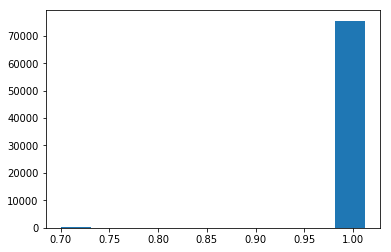

In [201]:
#PercentFunded
plt.hist(data = final_df, x = 'PercentFunded');

#### Plot Analysis

* Most of the users have '1' in percentfunded.

In [202]:
final_df['PercentFunded'].describe()

count    76216.000000
mean         0.998131
std          0.020572
min          0.700000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.012500
Name: PercentFunded, dtype: float64

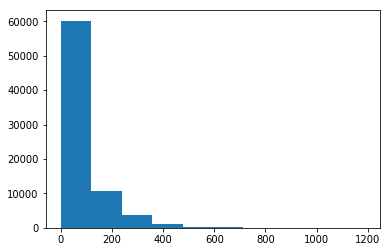

In [203]:
plt.hist(data = final_df, x = 'Investors');

#### Plot Analysis

* Most Investors are between 0 and 100.

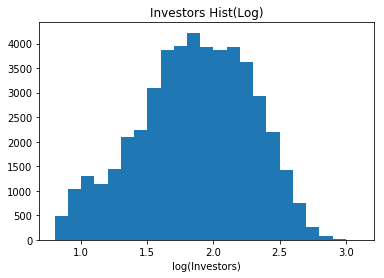

In [204]:
log_data = np.log10(final_df['Investors']) 
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(Investors)')
plt.title("Investors Hist(Log)");

#### Plot Analysis
*  After data plotted after direct log transformatio we have much understanding of the data points.

## Numerical variables analysis
1. BorrowerRate : This is unimodal distribution which has peak around 0.15.
2. StatedMonthlyIncome :This data will be right skewed as few people will have high salary.When i added the log scales to data we can see most of the people have salary less than 10,000 .
3. LoanOriginalAmount : This is right skewed and have peaks around 3000,10,000 and 15,000
4. Investors: Most Investors are between 0 and 100


## Bivariate Exploration

In [205]:

numeric_var = ['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
                'ProsperRating_Numeric', 'ProsperScore', 
                'ListingCategory_Numeric','EmploymentStatusDuration', 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'Recommendations', 'DebtToIncomeRatio','PercentFunded', 'Investors', 'LoanOriginalAmount_log',
                 'Investors_log']

numeric_var_1 = ['BorrowerRate',
                 'ProsperScore',                 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'LoanOriginalAmount', 'Investors']

categoric_var = ['LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus', 'Occupation',
       'IncomeRange', 'BorrowerState', 'Term', 'IsBorrowerHomeowner']

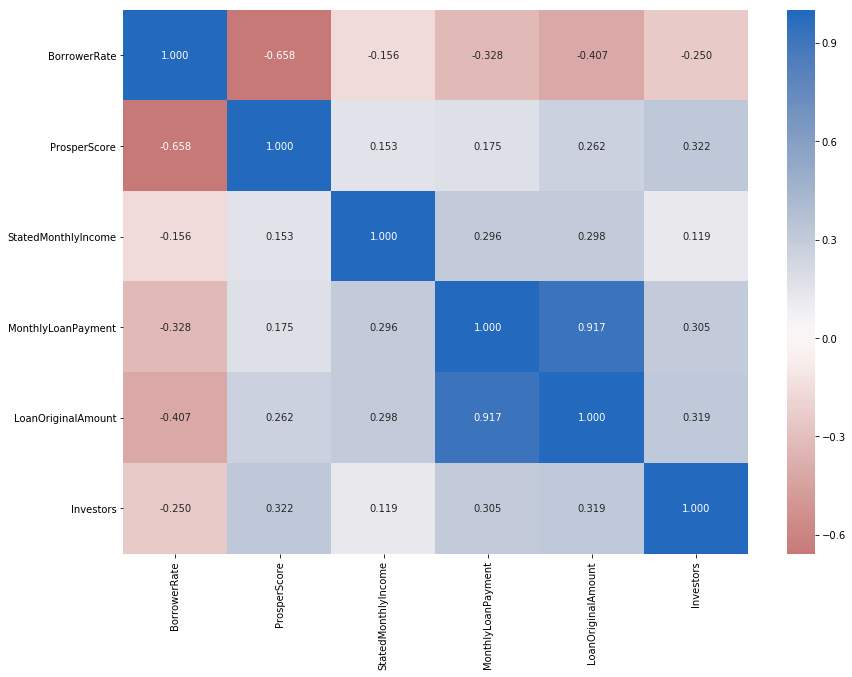

In [206]:
#correlation plot
#HeatMap
plt.figure(figsize = [14, 10])
sb.heatmap(final_df[numeric_var_1].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### Plot Analysis

* Loan Original Amount and Monthly Loan Payment is highly correlated and borrower interest rate and loanamount are negatively correlated.
* In this plot which ever r value is near to -1 or 1 there are strongly related to eachothers

### Relationship between numeric & categorical variables

<Figure size 720x720 with 0 Axes>

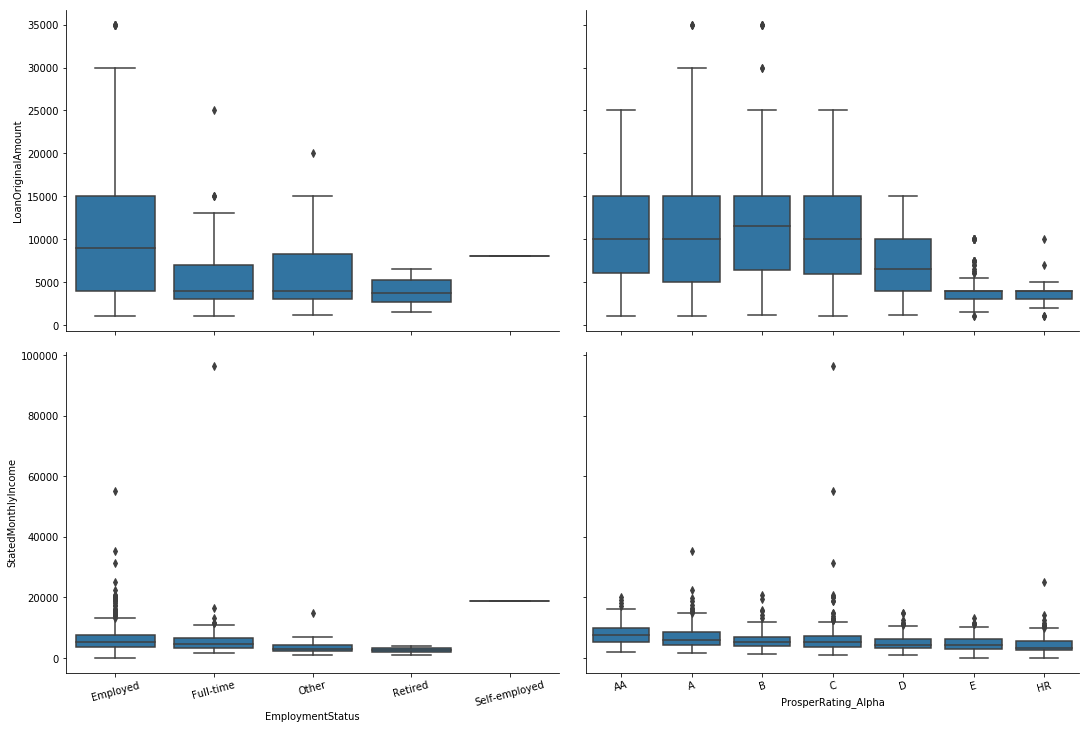

In [207]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.
categoric_var_1 = ['EmploymentStatus', 'ProsperRating_Alpha']
samples = np.random.choice(final_df.shape[0], 2000, replace = False)
final_df_sample = final_df.loc[samples,:]

def gridbox(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color);
    plt.xticks(rotation = 15);
    

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = final_df_sample, y_vars = [ 'LoanOriginalAmount', 'StatedMonthlyIncome'], 
                x_vars = categoric_var_1, size = 5, aspect = 1.5);

g.map(gridbox);
plt.xticks(rotation = 15);
plt.show();

#### Plot Analysis

* As we can see from the heatmap the correlation between StateMonthlyincome and loanOriginalamount is high thats why we see this both graph almost similar.

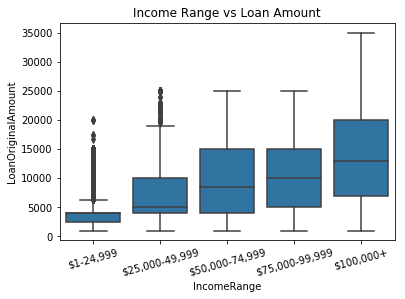

In [208]:
sb.boxplot(data = final_df_2, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount');

#### Plot Analysis

* 100k plus income range has the most outliers 
* they have big loan amount compare to others

### Categorical variables analysis

Text(0.5, 1.0, 'Count of Applicants w.r.t LoanStatus and HomeownerStatus')

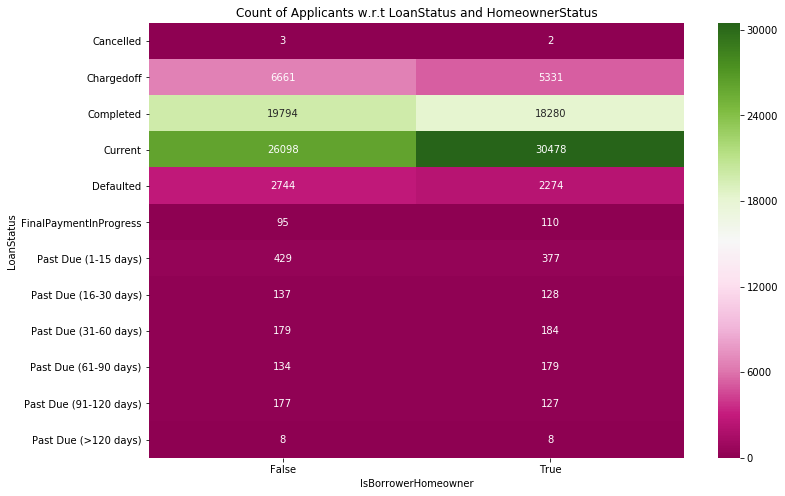

In [209]:
plt.figure(figsize = [12, 8])
ct_counts = df.groupby(['IsBorrowerHomeowner', 'LoanStatus']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'IsBorrowerHomeowner', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd',cmap="PiYG");
plt.title('Count of Applicants w.r.t LoanStatus and HomeownerStatus')

#### Plot Analysis
* We observe that without homeowner tend to have a higher interest rate, and thus lower rating.However homeowner tends to have lower interest rate and higher rating. 

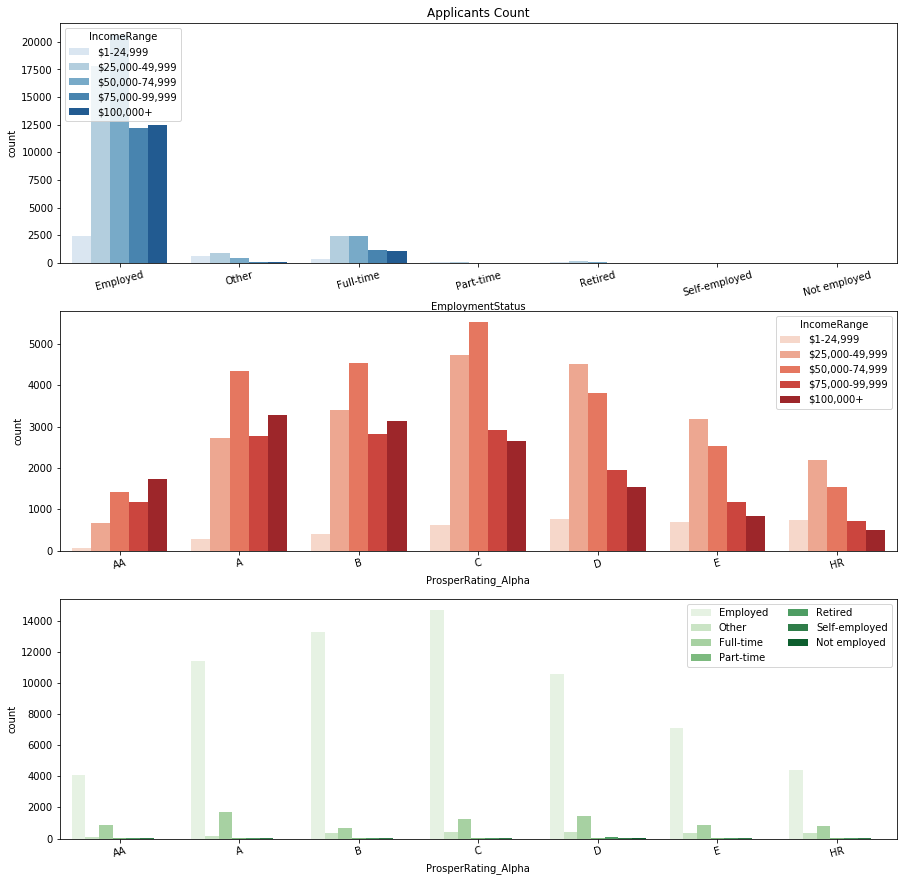

In [210]:
categoric_vars = ['EmploymentStatus', 'ProsperRating_Alpha', 'IncomeRange']

plt.figure(figsize = [15, 15])

# subplot 1: EmployementStatus vs IncomeRange
plt.subplot(3, 1, 1)
sb.countplot(data = final_df_2, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues')
plt.xticks(rotation = 15)
plt.title('Applicants Count')

# subplot 2: ProsperRating_Alpha vs IncomeRange
ax = plt.subplot(3, 1, 2)
sb.countplot(data = final_df_2, x = 'ProsperRating_Alpha', hue = 'IncomeRange', palette = 'Reds')

plt.xticks(rotation = 15)


# subplot 3: ProsperRating_Alpha vs EmploymentStatus
ax = plt.subplot(3, 1, 3)
sb.countplot(data = final_df_2, x = 'ProsperRating_Alpha', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2)
plt.xticks(rotation = 15)

plt.show()

#### Plot Analysis 

* Employed status applicants have most count.
* most of the loan applicants are from 50,000 to 75,000 range.
* incomerange of 50k to 75k have prosper rating AA,A,B and C.


##  Bivariate analysis

1. Loan Original Amount and Monthly Loan Payment is highly correlated and borrower interest rate and loanamount are negatively correlated.
2. highest loan amount taken by Employed and followed by others and fulltime Employess
3. salaries stated is higher for employed borrowers.
4. More salary borrowers have higher loanoriginalamount 
5. most house owner have loanstatus as current or completed.
6. most of the loan applicants are from 50,000 to 75,000 range.
7. incomerange of 50k to 75k have prosper rating AA,A,B and C.

## Multivariate Exploration

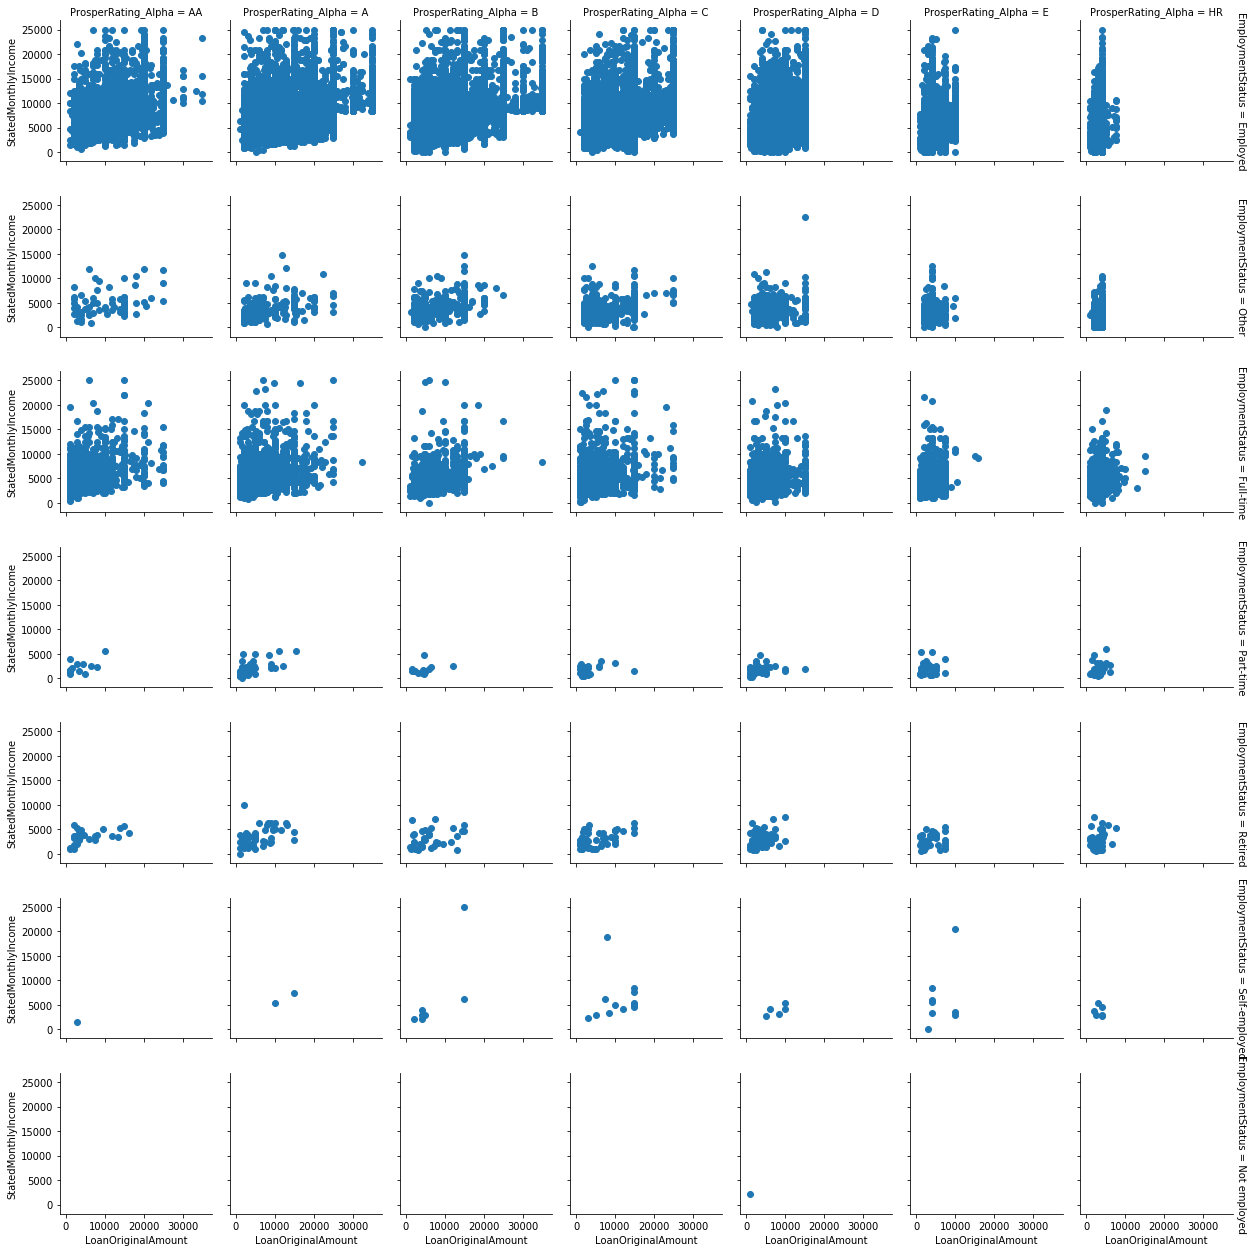

In [211]:
g = sb.FacetGrid(data = final_df_2, col = 'ProsperRating_Alpha', row = 'EmploymentStatus', size = 2.5,
                margin_titles = True);
g.map(plt.scatter, 'LoanOriginalAmount', 'StatedMonthlyIncome');

#### Plot analysis

* AA to D ratings applicants have big loan amount with high salary.

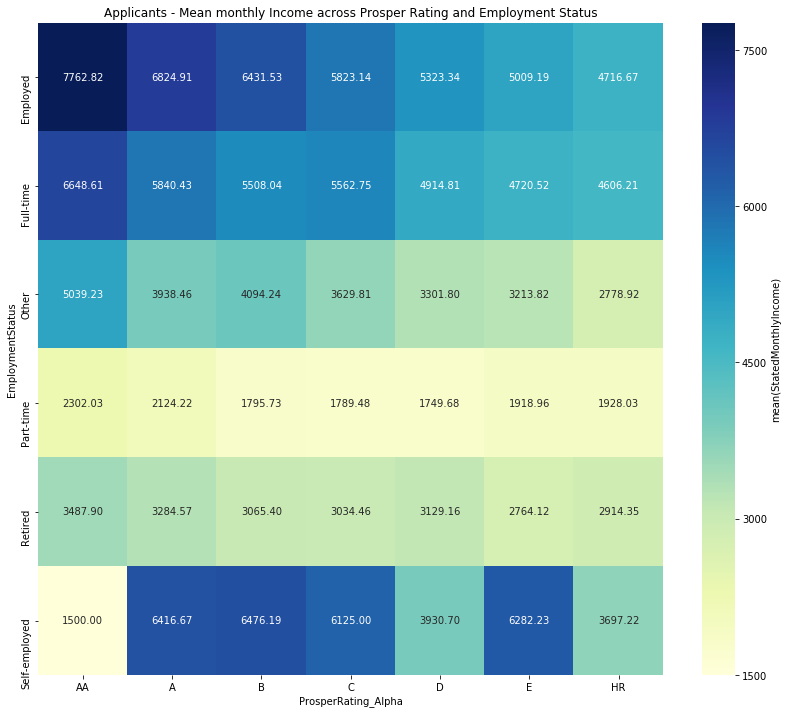

In [212]:
plt.figure(figsize = [14, 12])
final_df_2 = final_df_2[final_df_2['EmploymentStatus'] != 'Not employed']

cat_means = final_df_2.groupby(['ProsperRating_Alpha', 'EmploymentStatus']).mean()['StatedMonthlyIncome']
cat_means = cat_means.reset_index(name = 'StatedMonthlyIncome_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'ProsperRating_Alpha',
                            values = 'StatedMonthlyIncome_avg')
sb.heatmap(cat_means, annot = True, fmt = '.2f',
           cbar_kws = {'label' : 'mean(StatedMonthlyIncome)'},cmap="YlGnBu");
plt.title('Applicants - Mean monthly Income across Prosper Rating and Employment Status');

#### Plot Anlaysis

* Monthly income are higher for employed,other and full time employement with rating of AA,A and B

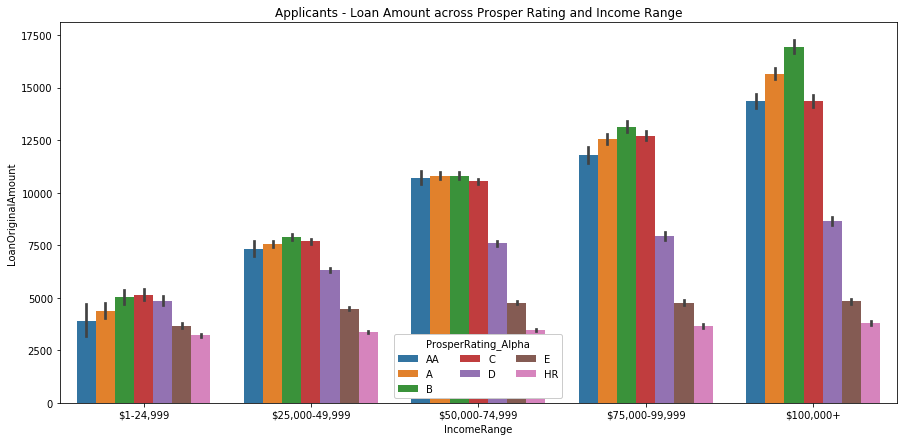

In [213]:
plt.figure(figsize = [15, 7])
ax = sb.barplot(data = final_df_2, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'ProsperRating_Alpha')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'ProsperRating_Alpha')
plt.title('Applicants - Loan Amount across Prosper Rating and Income Range');

#### Plot Analysis

* From this plot we can compare between all the prosperrating and there loan amount .for example Prosprrating 'HR' has taken smallest amount of loan.

### Does rating depend on the monhtly income and Employment status?

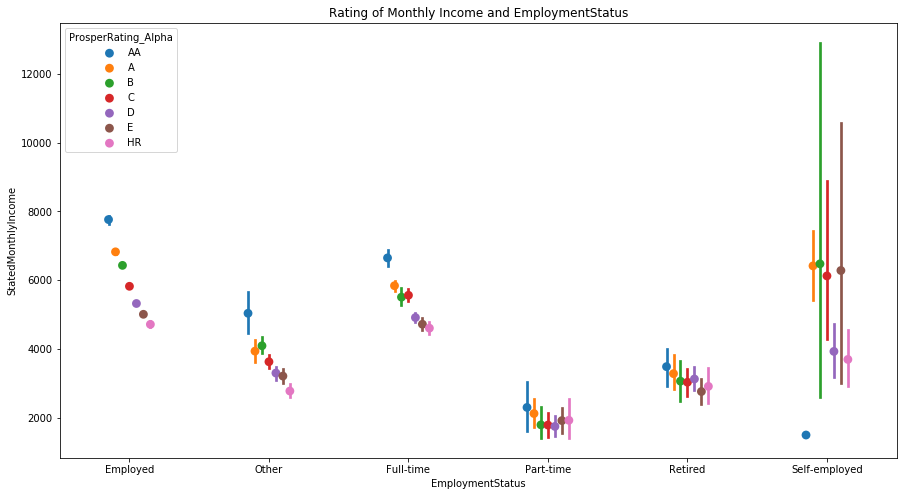

In [217]:

plt.figure(figsize = [15, 8])
ax = sb.pointplot(data = final_df_2, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating_Alpha',
                  dodge = 0.3, linestyles = "")
plt.title('Rating of Monthly Income and EmploymentStatus');

#### Plot Analysis 

* Rating depend on the monhtly income and Employment status.

### Did homeowner status has impacted the ProsperRating and Borrower Interest Rate?

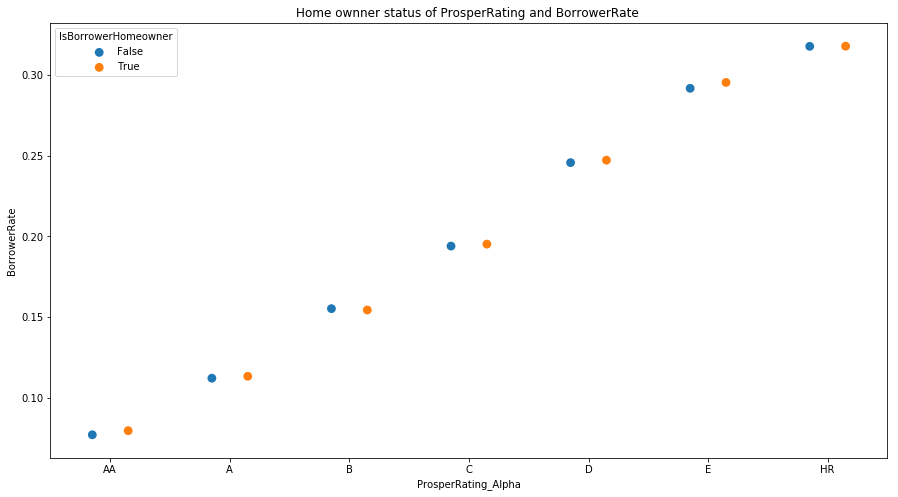

In [218]:

plt.figure(figsize = [15, 8])
ax = sb.pointplot(data = final_df_2, x = 'ProsperRating_Alpha', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                  dodge = 0.3, linestyles = "");
plt.title('Home ownner status of ProsperRating and BorrowerRate ');

#### Plot Analysis

* homeowner status has impacted the ProsperRating and Borrower Interest Rate.
* homeowner have higher interest rate so we can say that homeowner is good to give a loan.


##  multivariate exploration data

1. AA to D ratings applicants have big loan amount with high salary.
2. Majority falling under prosper rating of B
3. Monthly income are higher for employed,other and full time employement with rating of AA,A and B
4. homeowner have higher interest rate so we can say that homeowner is good to give a loan.
5. Loan approval status is dependent on IncomeRange,HomeOwnerStatus and Employment Status